In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
from datetime import datetime

In [11]:
accepted = pd.read_csv('accepted_before_2015.csv')

In [57]:
accepted.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       

In [ ]:
accepted['grade'].value_counts()

In [14]:
accepted.shape

(465834, 94)

In [55]:
def loan_length(d1, d2):
    d1 = pd.to_datetime(d1)
    d2 = pd.to_datetime(d2)
    return (d1.year - d2.year) * 12 + d1.month - d2.month

In [58]:
loan_months = []
for end, start in zip(accepted['last_pymnt_d'], accepted['issue_d']):
    loan_months.append(loan_length(end, start))

In [61]:
len(loan_months)

465834

In [62]:
accepted['loan_months'] = loan_months

In [64]:
accepted[['loan_months', 'term']]

,loan_months,term
0,20,36 months
1,18,60 months
2,4,36 months
3,8,36 months
4,51,60 months
...,...,...
465829,34,36 months
465830,36,36 months
465831,35,36 months
465832,3,36 months


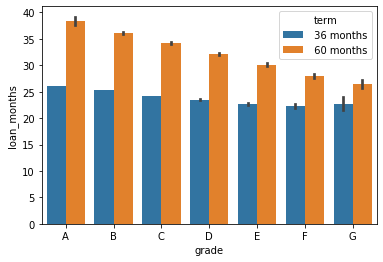

In [72]:
sns.barplot(x="grade", y="loan_months",
            hue="term",
            data=accepted,
            order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

# Run these three to get a little cormap

In [23]:
accepted['gradeOrdinal'] = accepted['grade'].apply(lambda x: 0 if x == 'G' else (1 if x == 'F' else (2 if x == 'E' else (3 if x == 'D' else (4 if x == 'C' else (5 if x == 'B' else 6))))))



In [25]:
acceptedcor = accepted[['fico_range_high', 'fico_range_low', 'int_rate', 'grade', 'loan_amnt', 'delinq_2yrs', 'gradeOrdinal']]

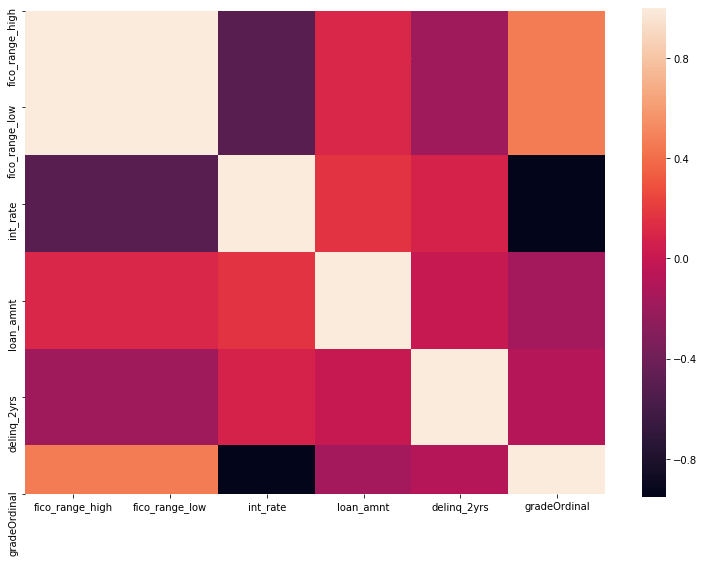

In [26]:
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(acceptedcor.corr(), vmax=1, square=True);

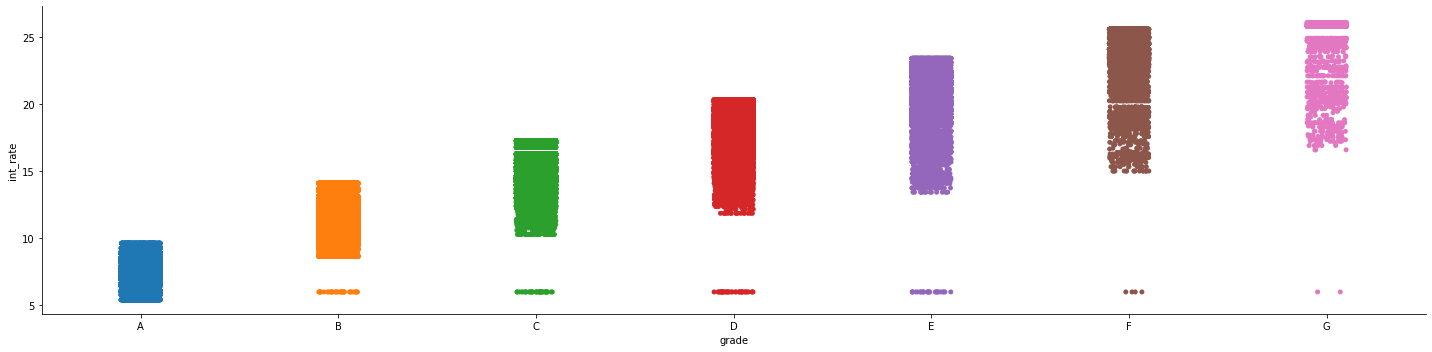

In [10]:
ax = sns.catplot(x="grade", y="int_rate", data=accepted, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], height = 5, aspect = 4)

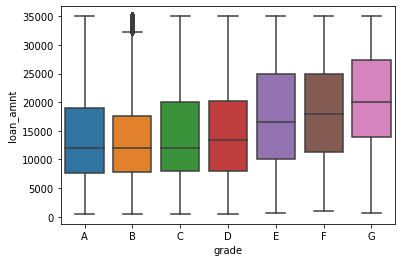

In [9]:
ax = sns.boxplot(x="grade", y="loan_amnt", data=accepted, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [3]:
accepted['int_rate'].value_counts()

12.99    15845
10.99    14839
15.61    13080
8.90     11426
16.29    10586
         ...  
24.40        1
14.28        1
17.44        1
16.83        1
24.59        1
Name: int_rate, Length: 507, dtype: int64

In [4]:
accepted['purpose'].value_counts()

debt_consolidation    274233
credit_card           104169
home_improvement       26541
other                  23692
major_purchase          9828
small_business          7014
car                     5398
medical                 4603
moving                  2995
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: purpose, dtype: int64

In [30]:
accepted['sub_grade'].value_counts()

B3    31690
B4    30508
C1    26959
C2    26745
B2    26612
C3    25323
B5    25258
C4    24108
B1    22879
C5    22179
A5    21759
D1    19262
A4    19045
D2    17047
D3    14922
D4    14101
A3    12569
D5    11568
A2    10956
A1    10542
E1     9034
E2     8669
E3     6977
E4     5992
E5     5087
F1     3941
F2     3002
F3     2708
F4     2068
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: sub_grade, dtype: int64

In [24]:
accepted['gradeOrdinal'].value_counts()

5    136947
4    125314
3     76900
6     74871
2     35759
1     13232
0      3322
Name: gradeOrdinal, dtype: int64